# cricWAR Results Visualization

Interactive exploration of Wins Above Replacement results for IPL players.

**Author**: Aryaman Gupta  
**Based on**: Rafique (2023) - cricWAR framework

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Paths
project_root = Path.cwd().parent
results_dir = project_root / 'results'

## 1. Load WAR Results

In [2]:
# Load batter and bowler WAR
batter_war = pd.read_csv(results_dir / '09_vorp_war' / 'batter_war.csv')
bowler_war = pd.read_csv(results_dir / '09_vorp_war' / 'bowler_war.csv')

print(f"Batters: {len(batter_war)}")
print(f"Bowlers: {len(bowler_war)}")

# Display top 10
print("\nTop 10 Batters by WAR:")
batter_war.head(10)[['batter_name', 'WAR', 'VORP', 'RAA', 'balls_faced']]

Batters: 703
Bowlers: 551

Top 10 Batters by WAR:


,batter_name,WAR,VORP,RAA,balls_faced
0,DA Warner,16.086122,1727.136960,475.4608,4864
1,AB de Villiers,14.386311,1544.631327,647.3051,3487
2,V Kohli,13.581079,1458.175171,-272.1436,6724
3,RG Sharma,13.369034,1435.408265,17.7512,5509
4,CH Gayle,13.127756,1409.502673,497.7657,3543
5,S Dhawan,11.888512,1276.447409,-137.0923,5493
6,SK Raina,11.657374,1251.630474,174.6846,4185
7,SA Yadav,11.260412,1209.009395,446.0119,2965
8,RV Uthappa,11.095119,1191.262272,175.8194,3946
9,SR Watson,10.041408,1078.127233,332.6285,2897


In [3]:
print("Top 10 Bowlers by WAR:")
bowler_war.head(10)[['bowler_name', 'WAR', 'VORP', 'RAA', 'balls_bowled']]

Top 10 Bowlers by WAR:


,bowler_name,WAR,VORP,RAA,balls_bowled
0,SP Narine,17.804908,1911.679733,867.4666,4421
1,JJ Bumrah,15.270812,1639.598631,819.0611,3474
2,R Ashwin,14.758588,1584.602096,434.8103,4868
3,B Kumar,13.401910,1438.938096,404.8813,4378
4,SL Malinga,12.496576,1341.734092,639.2935,2974
5,Rashid Khan,11.582128,1243.551482,478.9919,3237
6,DJ Bravo,9.749000,1046.731920,268.2369,3296
7,AR Patel,9.673058,1038.578149,241.8962,3373
8,YS Chahal,9.551993,1025.579692,103.2426,3905
9,Harbhajan Singh,9.221920,990.140296,164.4065,3496


## 2. WAR Distribution

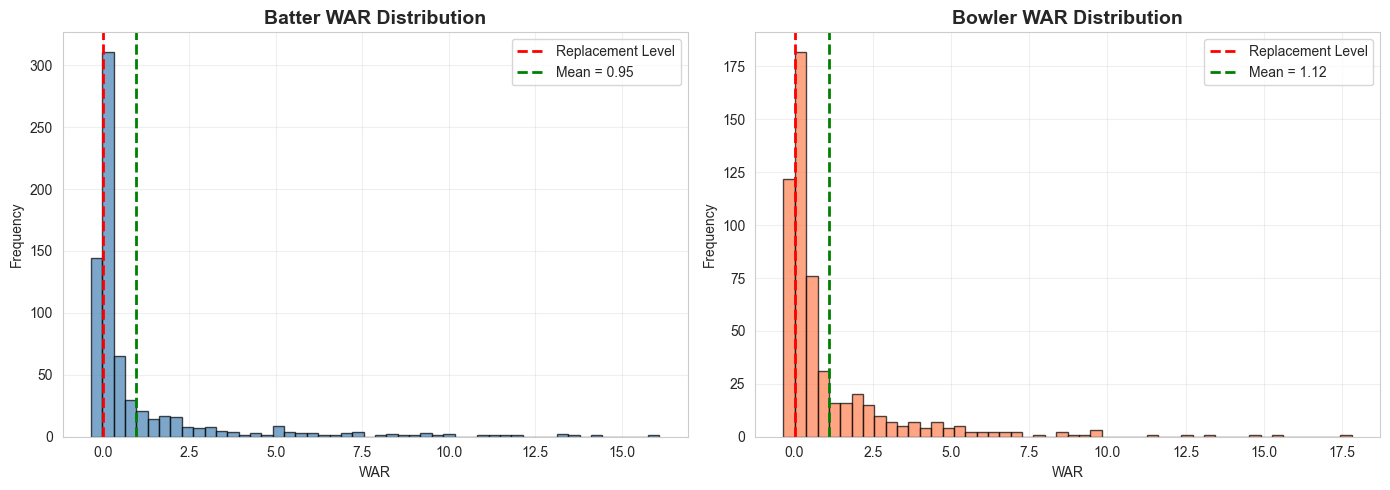

Batter WAR - Mean: 0.95, Std: 2.21
Bowler WAR - Mean: 1.12, Std: 2.20


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Batter WAR distribution
axes[0].hist(batter_war['WAR'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(0, color='red', linestyle='--', linewidth=2, label='Replacement Level')
axes[0].axvline(batter_war['WAR'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean = {batter_war["WAR"].mean():.2f}')
axes[0].set_xlabel('WAR')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Batter WAR Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Bowler WAR distribution
axes[1].hist(bowler_war['WAR'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(0, color='red', linestyle='--', linewidth=2, label='Replacement Level')
axes[1].axvline(bowler_war['WAR'].mean(), color='green', linestyle='--', linewidth=2, label=f'Mean = {bowler_war["WAR"].mean():.2f}')
axes[1].set_xlabel('WAR')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Bowler WAR Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Batter WAR - Mean: {batter_war['WAR'].mean():.2f}, Std: {batter_war['WAR'].std():.2f}")
print(f"Bowler WAR - Mean: {bowler_war['WAR'].mean():.2f}, Std: {bowler_war['WAR'].std():.2f}")

## 3. Top Performers Visualization

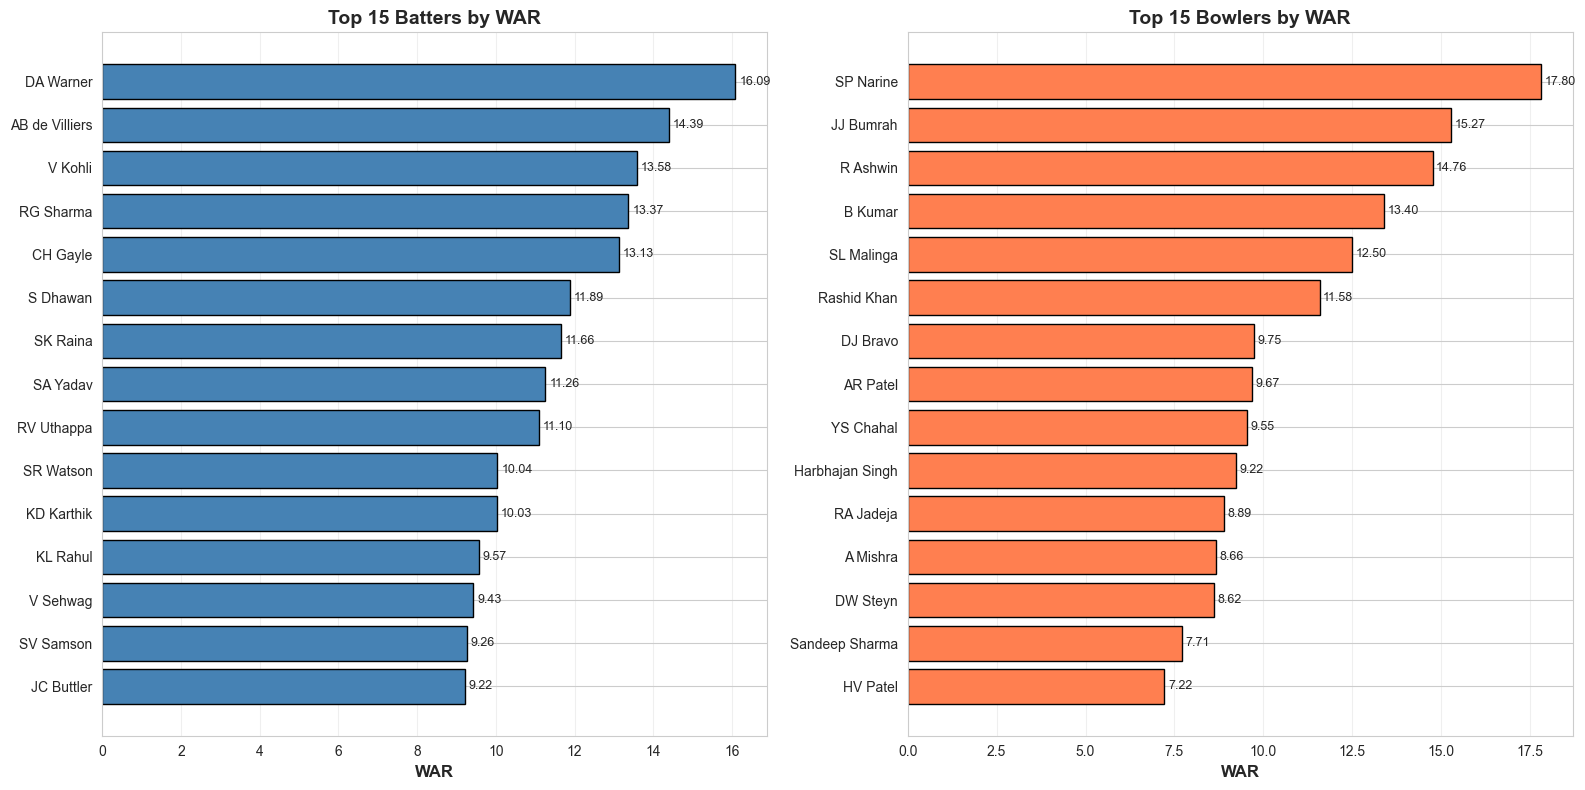

In [5]:
# Top 15 batters and bowlers
top_batters = batter_war.head(15).sort_values('WAR')
top_bowlers = bowler_war.head(15).sort_values('WAR')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Batters
axes[0].barh(range(len(top_batters)), top_batters['WAR'], color='steelblue', edgecolor='black')
axes[0].set_yticks(range(len(top_batters)))
axes[0].set_yticklabels(top_batters['batter_name'])
axes[0].set_xlabel('WAR', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Batters by WAR', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Add values on bars
for i, v in enumerate(top_batters['WAR']):
    axes[0].text(v + 0.1, i, f'{v:.2f}', va='center', fontsize=9)

# Bowlers
axes[1].barh(range(len(top_bowlers)), top_bowlers['WAR'], color='coral', edgecolor='black')
axes[1].set_yticks(range(len(top_bowlers)))
axes[1].set_yticklabels(top_bowlers['bowler_name'])
axes[1].set_xlabel('WAR', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 Bowlers by WAR', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Add values on bars
for i, v in enumerate(top_bowlers['WAR']):
    axes[1].text(v + 0.1, i, f'{v:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

## 4. WAR vs Playing Time

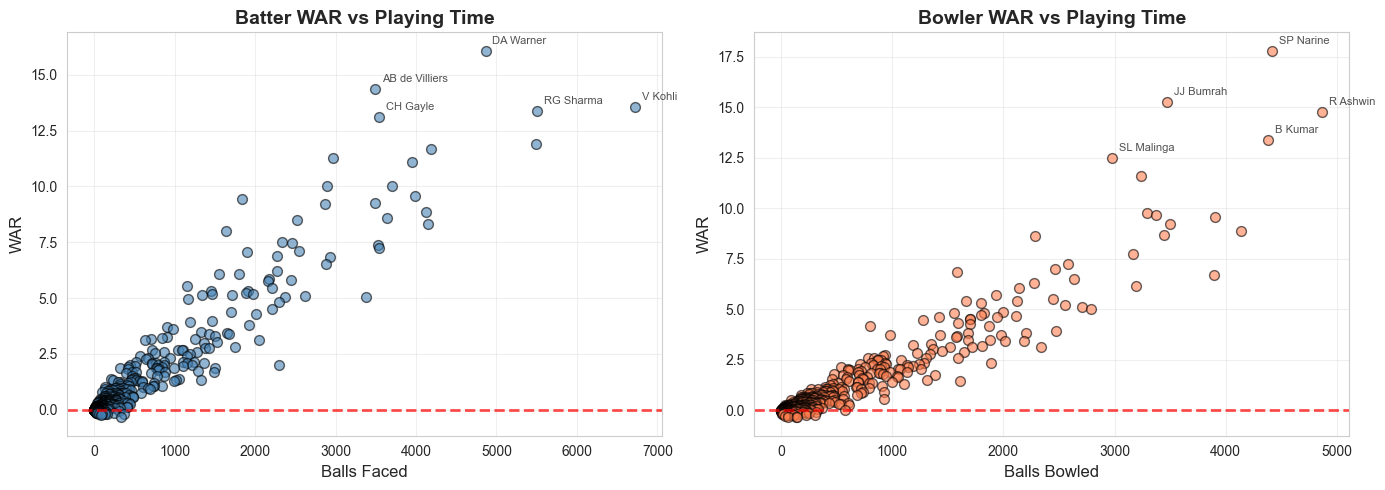

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Batters: WAR vs Balls Faced
axes[0].scatter(batter_war['balls_faced'], batter_war['WAR'], alpha=0.6, s=50, color='steelblue', edgecolors='black')
axes[0].axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[0].set_xlabel('Balls Faced', fontsize=12)
axes[0].set_ylabel('WAR', fontsize=12)
axes[0].set_title('Batter WAR vs Playing Time', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Annotate top players
for _, row in batter_war.head(5).iterrows():
    axes[0].annotate(row['batter_name'], 
                    (row['balls_faced'], row['WAR']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)

# Bowlers: WAR vs Balls Bowled
axes[1].scatter(bowler_war['balls_bowled'], bowler_war['WAR'], alpha=0.6, s=50, color='coral', edgecolors='black')
axes[1].axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[1].set_xlabel('Balls Bowled', fontsize=12)
axes[1].set_ylabel('WAR', fontsize=12)
axes[1].set_title('Bowler WAR vs Playing Time', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)

# Annotate top players
for _, row in bowler_war.head(5).iterrows():
    axes[1].annotate(row['bowler_name'], 
                    (row['balls_bowled'], row['WAR']),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)

plt.tight_layout()
plt.show()

## 5. WAR per Ball (Efficiency)

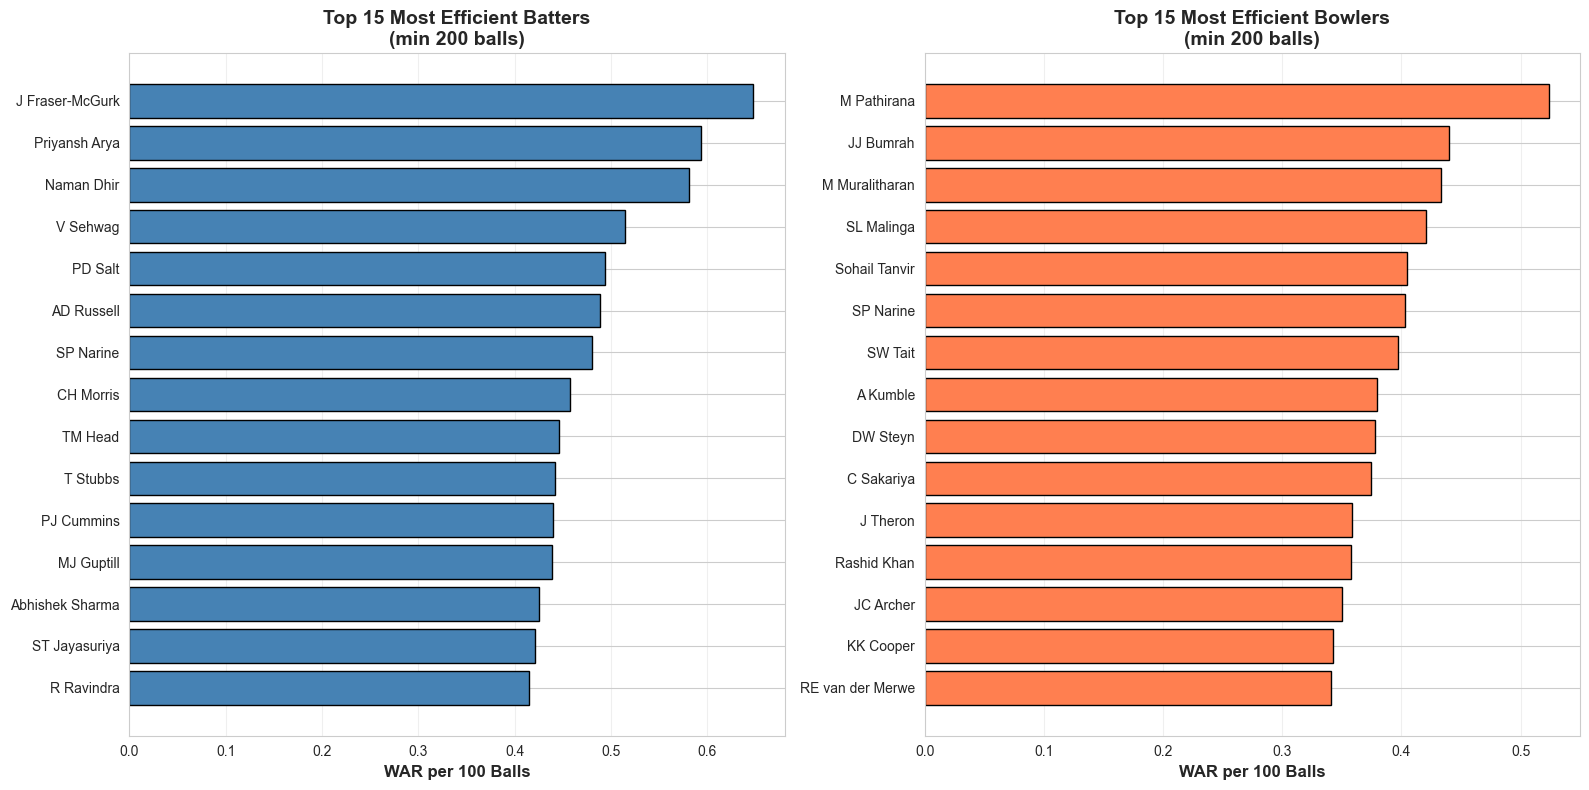

In [7]:
# Filter qualified players (min 200 balls)
qualified_batters = batter_war[batter_war['balls_faced'] >= 200].copy()
qualified_bowlers = bowler_war[bowler_war['balls_bowled'] >= 200].copy()

# Top by efficiency
top_efficient_batters = qualified_batters.nlargest(15, 'WAR_per_ball')
top_efficient_bowlers = qualified_bowlers.nlargest(15, 'WAR_per_ball')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Batters
top_efficient_batters_sorted = top_efficient_batters.sort_values('WAR_per_ball')
axes[0].barh(range(len(top_efficient_batters_sorted)), top_efficient_batters_sorted['WAR_per_ball'] * 100, 
             color='steelblue', edgecolor='black')
axes[0].set_yticks(range(len(top_efficient_batters_sorted)))
axes[0].set_yticklabels(top_efficient_batters_sorted['batter_name'])
axes[0].set_xlabel('WAR per 100 Balls', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Most Efficient Batters\n(min 200 balls)', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)

# Bowlers
top_efficient_bowlers_sorted = top_efficient_bowlers.sort_values('WAR_per_ball')
axes[1].barh(range(len(top_efficient_bowlers_sorted)), top_efficient_bowlers_sorted['WAR_per_ball'] * 100,
             color='coral', edgecolor='black')
axes[1].set_yticks(range(len(top_efficient_bowlers_sorted)))
axes[1].set_yticklabels(top_efficient_bowlers_sorted['bowler_name'])
axes[1].set_xlabel('WAR per 100 Balls', fontsize=12, fontweight='bold')
axes[1].set_title('Top 15 Most Efficient Bowlers\n(min 200 balls)', fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Combined Leaderboard

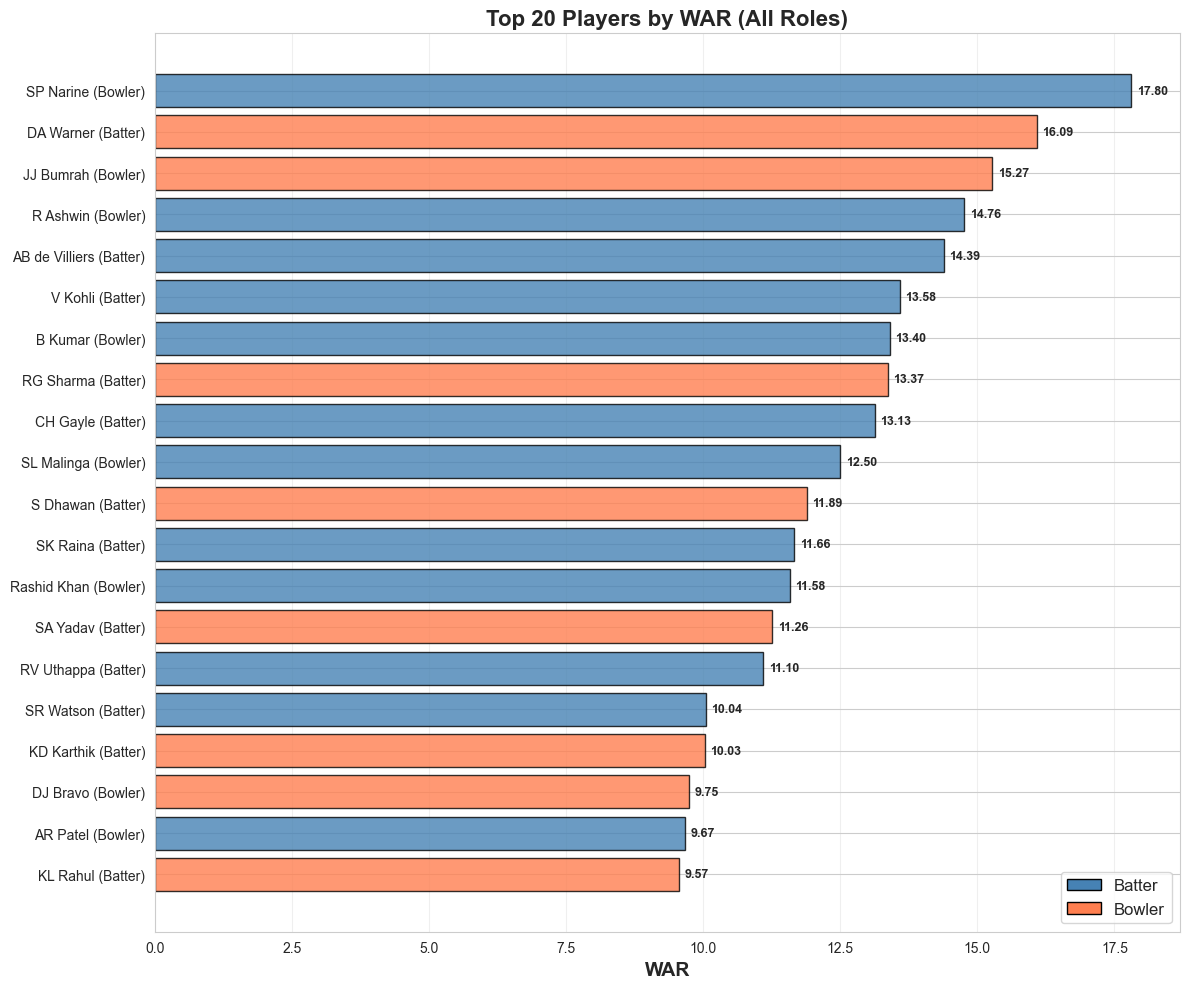

,player_name,WAR,VORP,balls,role
0,SP Narine,17.804908,1911.679733,4421,Bowler
0,DA Warner,16.086122,1727.136960,4864,Batter
1,JJ Bumrah,15.270812,1639.598631,3474,Bowler
2,R Ashwin,14.758588,1584.602096,4868,Bowler
1,AB de Villiers,14.386311,1544.631327,3487,Batter
2,V Kohli,13.581079,1458.175171,6724,Batter
3,B Kumar,13.401910,1438.938096,4378,Bowler
3,RG Sharma,13.369034,1435.408265,5509,Batter
4,CH Gayle,13.127756,1409.502673,3543,Batter
4,SL Malinga,12.496576,1341.734092,2974,Bowler


In [8]:
# Combine batters and bowlers
batters_for_combined = batter_war[['batter_name', 'WAR', 'VORP', 'balls_faced']].copy()
batters_for_combined.columns = ['player_name', 'WAR', 'VORP', 'balls']
batters_for_combined['role'] = 'Batter'

bowlers_for_combined = bowler_war[['bowler_name', 'WAR', 'VORP', 'balls_bowled']].copy()
bowlers_for_combined.columns = ['player_name', 'WAR', 'VORP', 'balls']
bowlers_for_combined['role'] = 'Bowler'

combined = pd.concat([batters_for_combined, bowlers_for_combined])
combined = combined.sort_values('WAR', ascending=False).head(20)

# Visualization
plt.figure(figsize=(12, 10))
colors = ['steelblue' if role == 'Batter' else 'coral' for role in combined['role']]

combined_sorted = combined.sort_values('WAR')
plt.barh(range(len(combined_sorted)), combined_sorted['WAR'], color=colors, edgecolor='black', alpha=0.8)
plt.yticks(range(len(combined_sorted)), 
           [f"{row['player_name']} ({row['role']})" for _, row in combined_sorted.iterrows()])
plt.xlabel('WAR', fontsize=14, fontweight='bold')
plt.title('Top 20 Players by WAR (All Roles)', fontsize=16, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', edgecolor='black', label='Batter'),
                   Patch(facecolor='coral', edgecolor='black', label='Bowler')]
plt.legend(handles=legend_elements, loc='lower right', fontsize=12)

# Add values
for i, v in enumerate(combined_sorted['WAR']):
    plt.text(v + 0.1, i, f'{v:.2f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Display table
combined.head(20)

## 7. Summary Statistics

In [9]:
print("="*70)
print("CRICWAR SUMMARY STATISTICS")
print("="*70)

print("\nBATTERS:")
print(f"  Total players: {len(batter_war)}")
print(f"  Mean WAR: {batter_war['WAR'].mean():.3f}")
print(f"  Median WAR: {batter_war['WAR'].median():.3f}")
print(f"  Max WAR: {batter_war['WAR'].max():.3f} ({batter_war.loc[batter_war['WAR'].idxmax(), 'batter_name']})")
print(f"  Min WAR: {batter_war['WAR'].min():.3f} ({batter_war.loc[batter_war['WAR'].idxmin(), 'batter_name']})")
print(f"  Players with WAR > 2.0: {(batter_war['WAR'] > 2.0).sum()}")
print(f"  Players with WAR > 1.0: {(batter_war['WAR'] > 1.0).sum()}")
print(f"  Players with WAR < 0.0: {(batter_war['WAR'] < 0.0).sum()}")

print("\nBOWLERS:")
print(f"  Total players: {len(bowler_war)}")
print(f"  Mean WAR: {bowler_war['WAR'].mean():.3f}")
print(f"  Median WAR: {bowler_war['WAR'].median():.3f}")
print(f"  Max WAR: {bowler_war['WAR'].max():.3f} ({bowler_war.loc[bowler_war['WAR'].idxmax(), 'bowler_name']})")
print(f"  Min WAR: {bowler_war['WAR'].min():.3f} ({bowler_war.loc[bowler_war['WAR'].idxmin(), 'bowler_name']})")
print(f"  Players with WAR > 2.0: {(bowler_war['WAR'] > 2.0).sum()}")
print(f"  Players with WAR > 1.0: {(bowler_war['WAR'] > 1.0).sum()}")
print(f"  Players with WAR < 0.0: {(bowler_war['WAR'] < 0.0).sum()}")

CRICWAR SUMMARY STATISTICS

BATTERS:
  Total players: 703
  Mean WAR: 0.953
  Median WAR: 0.060
  Max WAR: 16.086 (DA Warner)
  Min WAR: -0.351 (GH Vihari)
  Players with WAR > 2.0: 98
  Players with WAR > 1.0: 149
  Players with WAR < 0.0: 228

BOWLERS:
  Total players: 551
  Mean WAR: 1.115
  Median WAR: 0.249
  Max WAR: 17.805 (SP Narine)
  Min WAR: -0.354 (V Sehwag)
  Players with WAR > 2.0: 101
  Players with WAR > 1.0: 148
  Players with WAR < 0.0: 110


## 8. Export Top Players

In [10]:
# Export top 50 to CSV for easy sharing
top_50_batters = batter_war.head(50)
top_50_bowlers = bowler_war.head(50)

output_dir = project_root / 'results' / 'visualizations'
output_dir.mkdir(exist_ok=True, parents=True)

top_50_batters.to_csv(output_dir / 'top_50_batters.csv', index=False)
top_50_bowlers.to_csv(output_dir / 'top_50_bowlers.csv', index=False)

print(f"✓ Exported top 50 batters to {output_dir / 'top_50_batters.csv'}")
print(f"✓ Exported top 50 bowlers to {output_dir / 'top_50_bowlers.csv'}")

✓ Exported top 50 batters to /Users/aryamangupta/CricML/Match_Prediction/cricWAR/results/visualizations/top_50_batters.csv
✓ Exported top 50 bowlers to /Users/aryamangupta/CricML/Match_Prediction/cricWAR/results/visualizations/top_50_bowlers.csv
